In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [161]:
# Load Data
df = pd.read_csv("starcraft_player_data.csv")
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [162]:
# Start Cleaning Set

In [163]:
# Check for any missing values to eliminate
df.isnull().sum()

GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

In [164]:
# Check for any datatypes to convert
df.dtypes

GameID                    int64
LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

In [165]:
# Checking obj columns
print(df['Age'])

0       27
1       23
2       30
3       19
4       32
        ..
3390     ?
3391     ?
3392     ?
3393     ?
3394     ?
Name: Age, Length: 3395, dtype: object


In [166]:
df['HoursPerWeek']

0       10
1       10
2       10
3       20
4       10
        ..
3390     ?
3391     ?
3392     ?
3393     ?
3394     ?
Name: HoursPerWeek, Length: 3395, dtype: object

In [167]:
df['TotalHours']

0       3000
1       5000
2        200
3        400
4        500
        ... 
3390       ?
3391       ?
3392       ?
3393       ?
3394       ?
Name: TotalHours, Length: 3395, dtype: object

In [168]:
# Indentifying the number of rows in each LeagueIndex
# There is a gap collected between higher and lower ranks

def ranked_rows (rank):
    
    Ranks = df[df['LeagueIndex']== rank]
    print(Ranks.shape)

print(ranked_rows(1), ranked_rows(2), ranked_rows(3), ranked_rows(4),
      ranked_rows(5), ranked_rows(6), ranked_rows(7), ranked_rows(8))

(167, 20)
(347, 20)
(553, 20)
(811, 20)
(806, 20)
(621, 20)
(35, 20)
(55, 20)
None None None None None None None None


In [169]:
# Double checking for nulls in Columns
# The nulls were placed as question marks
rows_with_question = df[df['TotalHours'] == '?']
rows_with_question

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
358,1064,5,17,20,?,94.4724,0.003846,0.000783,3,0.000010,0.000135,0.004474,50.5455,54.9287,3.0972,31,0.000763,7,0.000106,0.000116
1841,5255,5,18,?,?,122.2470,0.006357,0.000433,3,0.000014,0.000257,0.003043,30.8929,62.2933,5.3822,23,0.001055,5,0.000000,0.000338
3340,10001,8,?,?,?,189.7404,0.004582,0.000655,4,0.000073,0.000618,0.006291,23.5130,32.5665,4.4451,25,0.002218,6,0.000000,0.000000
3341,10005,8,?,?,?,287.8128,0.029040,0.001041,9,0.000231,0.000656,0.005399,31.6416,36.1143,4.5893,34,0.001138,6,0.000058,0.000000
3342,10006,8,?,?,?,294.0996,0.029640,0.001076,6,0.000302,0.002374,0.006294,16.6393,36.8192,4.1850,26,0.000987,6,0.000000,0.000000
3343,10015,8,?,?,?,274.2552,0.018121,0.001264,8,0.000053,0.000975,0.007111,10.6419,24.3556,4.3870,28,0.001106,6,0.000000,0.000000
3344,10016,8,?,?,?,274.3404,0.023131,0.000739,8,0.000622,0.003552,0.005355,19.1568,36.3098,5.2811,28,0.000739,6,0.000000,0.000000
3345,10017,8,?,?,?,245.8188,0.010471,0.000841,10,0.000657,0.001314,0.005031,14.5518,36.7134,7.1943,33,0.001474,11,0.000040,0.000048
3346,10018,8,?,?,?,211.0722,0.013049,0.000940,10,0.000366,0.000909,0.003719,19.6169,38.9326,7.1320,23,0.000898,9,0.000000,0.000000
3347,10021,8,?,?,?,189.5778,0.007559,0.000487,10,0.000606,0.000566,0.005821,22.0317,36.7330,4.9050,28,0.000540,5,0.000000,0.000000


In [170]:
# Removing the columns with nulls for all of rank 8 (Collecting hours would be important)
Remove_columns = ['Age', 'TotalHours', 'HoursPerWeek']
New_df = df.drop(columns=Remove_columns)

In [171]:
# Finding summary stats
New_df.describe()

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


In [172]:
#Function to find and remove the outliers

Test = New_df

def outlier_removal(cols):
    
# Upper and lower limits
    upper_limit = Test[cols].mean() + 3 * Test[cols].std()
    lower_limit = Test[cols].mean() - 3 * Test[cols].std()

    print("Upper limit:", upper_limit)
    print("Lower limit:", lower_limit)

# Filter based on limits
    filtered_data = Test[(Test[cols] > upper_limit) | (Test[cols] < lower_limit)]

outlier_removal(Test.columns)

filtered_data



Upper limit: GameID                  12964.846925
LeagueIndex                 8.736075
APM                       272.882820
SelectByHotkeys             0.020152
AssignToHotkeys             0.001048
UniqueHotkeys              11.445653
MinimapAttacks              0.000596
MinimapRightClicks          0.001518
NumberOfPACs                0.006440
GapBetweenPACs             91.822273
ActionLatency             121.456010
ActionsInPAC                9.757495
TotalMapExplored           44.426822
WorkersMade                 0.002589
UniqueUnitsMade            12.107111
ComplexUnitsMade            0.000393
ComplexAbilitiesUsed        0.000938
dtype: float64
Lower limit: GameID                 -3354.822182
LeagueIndex               -0.367886
APM                      -38.788926
SelectByHotkeys           -0.011555
AssignToHotkeys           -0.000301
UniqueHotkeys             -2.716345
MinimapAttacks            -0.000399
MinimapRightClicks        -0.000744
NumberOfPACs               0.000486
GapBet

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
204,631,6,187.4826,0.011671,0.000664,7,0.000111,0.000812,0.007034,33.3800,33.2238,3.1206,27,0.001328,8,0.000049,0.000012
464,1352,6,286.5528,0.020334,0.000673,10,0.000133,0.001143,0.006448,21.5658,28.7342,5.2358,37,0.001510,8,0.000153,0.000796
500,1463,7,202.0026,0.013070,0.000816,4,0.000149,0.000378,0.006615,20.0964,33.9368,3.7699,25,0.001154,7,0.000000,0.000000
537,1559,6,277.3212,0.013229,0.000526,6,0.000016,0.000704,0.006959,16.6938,24.6326,5.1895,27,0.001489,10,0.000146,0.000194
687,1988,7,172.3362,0.004740,0.000717,5,0.000235,0.000353,0.007971,18.0054,30.2604,3.3221,27,0.000920,6,0.000000,0.000000
1458,4187,6,215.7420,0.008809,0.000316,5,0.000084,0.000177,0.006728,27.2365,31.5359,4.4392,28,0.001533,9,0.000279,0.000474
1654,4754,7,236.0316,0.015664,0.001015,10,0.000366,0.001632,0.006487,18.7787,29.9871,4.3371,25,0.001507,8,0.000000,0.000000
1685,4839,6,283.2756,0.018457,0.001021,8,0.000101,0.000201,0.006512,21.2301,31.7439,5.2759,20,0.002789,6,0.000216,0.000474
1787,5129,7,213.6318,0.014339,0.000842,7,0.000161,0.000391,0.006499,30.5893,35.2771,4.1092,35,0.001311,11,0.000318,0.002217
1846,5268,6,215.1456,0.008820,0.000619,9,0.000057,0.000126,0.007191,21.2077,31.8150,4.2903,41,0.003819,8,0.000057,0.000011


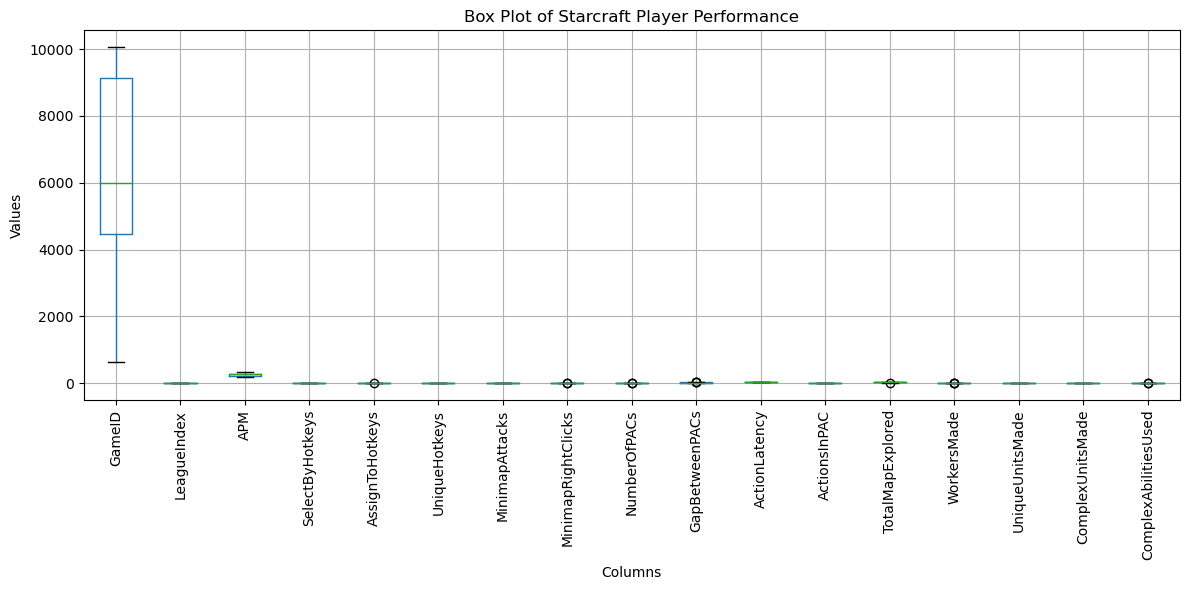

In [173]:
# Box plot to visualize removed outliers
plt.figure(figsize=(12, 6))
filtered_data.boxplot()

plt.title('Box Plot of Starcraft Player Performance')
plt.xlabel('Columns')
plt.ylabel('Values')

plt.xticks(rotation=90)  #Adjusts the rotation angle of column label to be more readable

# Adjust the layout to prevent label overlapping
plt.tight_layout()

# Display the plot
plt.show()

In [174]:
# Based on filtered data there seems to be a large scale difference among League indexes below 6

# Comparing means of each column grouped by LeagueIndexes to 
New_df.groupby(['LeagueIndex'])[New_df.columns].mean()

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
LeagueIndex,,,,,,,,,,,,,,,,,
1,4427.359281,1.0,59.539277,0.001081,0.000185,3.215569,0.000028,0.000208,0.002363,65.654987,95.404977,4.548287,18.730539,0.000626,5.826347,0.000015,0.000042
2,4668.334294,2.0,74.780917,0.001536,0.000222,3.351585,0.000045,0.000276,0.002650,53.788886,81.270053,5.005949,19.824207,0.000801,6.074928,0.000024,0.000076
3,4725.052441,3.0,89.971260,0.002188,0.000282,3.687161,0.000056,0.000332,0.002976,46.143882,73.697301,5.163282,20.506329,0.000919,6.368897,0.000045,0.000117
4,4715.130703,4.0,105.847166,0.003150,0.000340,3.971640,0.000075,0.000368,0.003310,41.041426,64.793765,5.236971,22.019729,0.001006,6.573366,0.000065,0.000138
5,4704.777916,5.0,131.520718,0.004980,0.000414,4.699752,0.000115,0.000426,0.003744,34.726473,56.085007,5.468031,23.075682,0.001168,6.699752,0.000076,0.000176
6,4843.792271,6.0,158.683211,0.007437,0.000512,5.521739,0.000156,0.000473,0.004231,30.207895,48.947837,5.475560,24.307568,0.001211,6.869565,0.000077,0.000182
7,4683.771429,7.0,189.555686,0.009418,0.000723,6.771429,0.000340,0.000570,0.005111,22.978160,40.342903,5.226089,28.028571,0.001238,7.028571,0.000082,0.000267
8,10051.509091,8.0,267.341236,0.020981,0.000937,7.345455,0.000376,0.000831,0.005237,18.969773,35.390153,5.676727,22.854545,0.001077,6.127273,0.000026,0.000135


In [100]:
# Scaling/Normalizing data
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(filtered_data), columns=filtered_data.columns)

In [ ]:
# Variance
variances = df_normalized.var()
threshold = 0.01

In [ ]:
# Correlation plot (heatmap)

In [61]:
#Finding the zscore of columns
#df_zscore = New_df.select_dtypes(include='number').apply(stats.zscore)
#print(df_zscore)

In [60]:
# Finding the outliers
#print(np.where(df_zscore > 3))

In [59]:
# Remove outliers using using Zscore
#starcraft = df_zscore
#starcraft = starcraft[(df_zscore < 3).all(axis=1)]

In [159]:
# Graph by League Index

In [46]:
# Descriptive stats by League index
# Groupby?

In [ ]:
#Classification or Clustering?